# EDA using Pivot table in Pandas

##### Sanjida Parvin

#### Import libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Import data

In [2]:
df = pd.read_csv("ford.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


#### Create EDA by using pivot table

In [3]:
df_pivot_model = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
df_pivot_transmission = pd.pivot_table(df, index='transmission', values='price', aggfunc=['count', 'mean', 'sum'])
df_pivot_fuelType = pd.pivot_table(df, index='fuelType', values='price', aggfunc=['count', 'mean', 'sum'])

#### Data processing before visualization

In [4]:
# Data processing based on model

# sort the dataframe based on the column 'count'
df_pivot_model = df_pivot_model.sort_values(by=('count', 'price'), ascending=False)

# create a new column percentage of the cars in each model
df_pivot_model['percent_of_cars'] = (df_pivot_model['count']/df_pivot_model['count'].sum())*100

# convert the 'sum' column in millions
df_pivot_model['sum'] = df_pivot_model['sum']/1000000

# keep up to two decimal points
df_pivot_model = df_pivot_model.round(2)

# remove the 'count' column
df_pivot_model = df_pivot_model.drop('count', axis=1)

In [5]:
# Data processing based on transmission

# sort the dataframe based on the column 'count'
df_pivot_transmission = df_pivot_transmission.sort_values(by=('count', 'price'), ascending=False)

# create a new column percentage of the cars in each model
df_pivot_transmission['percent_of_cars'] = (df_pivot_transmission['count']/df_pivot_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_pivot_transmission['sum'] = df_pivot_transmission['sum']/1000000

# keep up to two decimal points
df_pivot_transmission = df_pivot_transmission.round(2)

# remove the 'count' column
df_pivot_transmission = df_pivot_transmission.drop('count', axis=1)

In [6]:
# Data processing based on fuelType

# sort the dataframe based on the column 'count'
df_pivot_fuelType = df_pivot_fuelType.sort_values(by=('count', 'price'), ascending=False)

# create a new column percentage of the cars in each model
df_pivot_fuelType['percent_of_cars'] = (df_pivot_fuelType['count']/df_pivot_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_pivot_fuelType['sum'] = df_pivot_fuelType['sum']/1000000

# keep up to two decimal points
df_pivot_fuelType = df_pivot_fuelType.round(2)

# remove the 'count' column
df_pivot_fuelType = df_pivot_fuelType.drop('count', axis=1)

#### Data visualization using barplot

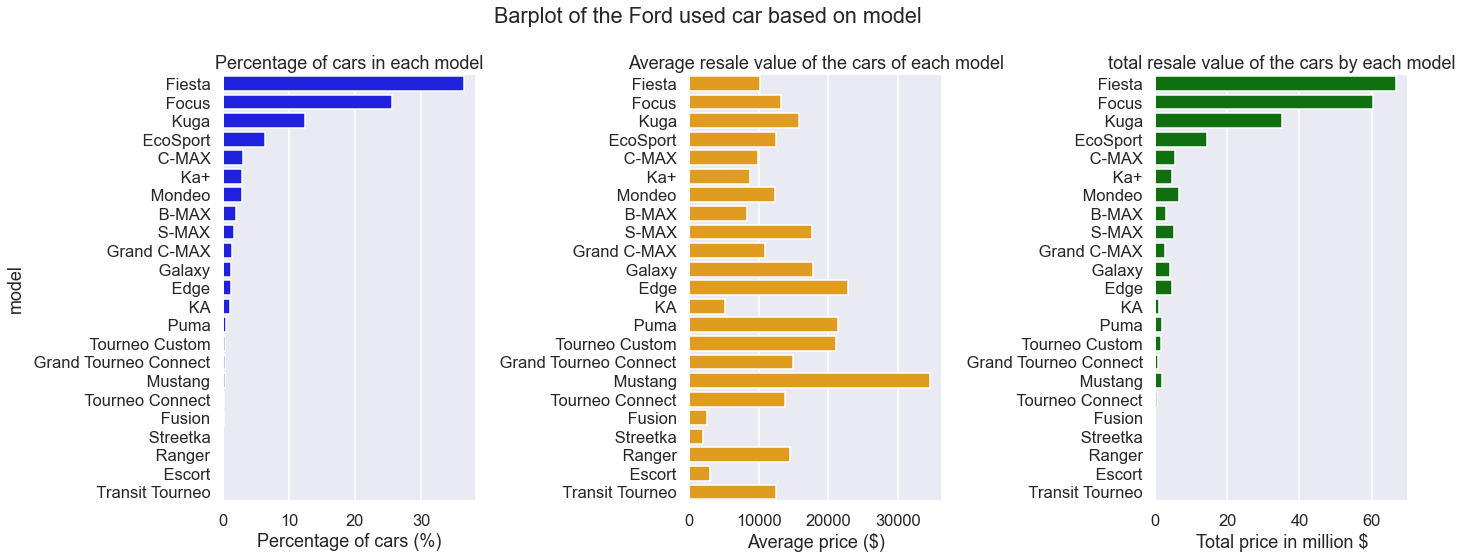

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_pivot_model.index, data=df_pivot_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x=('mean', 'price'), y=df_pivot_model.index, data=df_pivot_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x=('sum', 'price'), y=df_pivot_model.index, data=df_pivot_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car based on model")
plt.tight_layout()
plt.show()

- Fiesta model is the most used car in the market
- Mustaring model car has the highest price on average in the market 
- Fiesta model car has the highest resale value among all the models

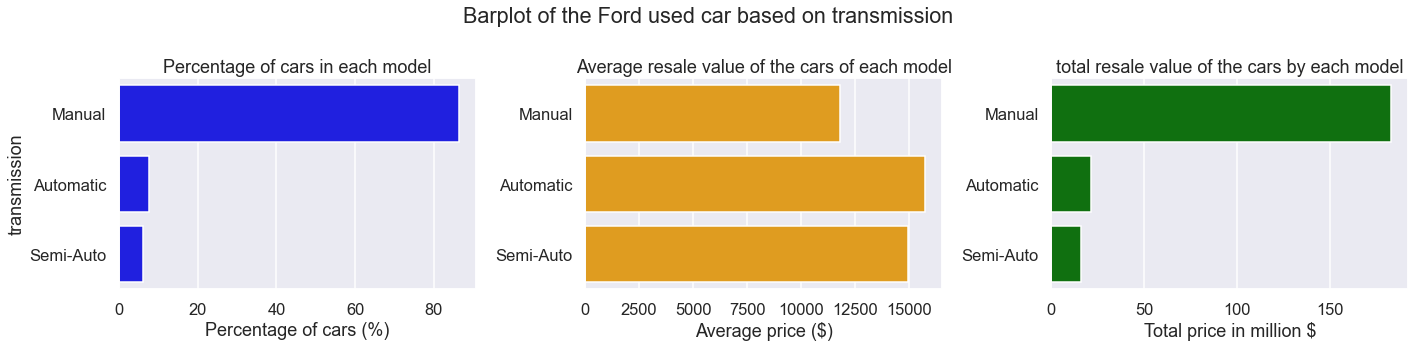

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_pivot_transmission.index, data=df_pivot_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x=('mean', 'price'), y=df_pivot_transmission.index, data=df_pivot_transmission, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x=('sum', 'price'), y=df_pivot_transmission.index, data=df_pivot_transmission, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car based on transmission")
plt.tight_layout()
plt.show()

- Manual type transmissions are highly used. 
- Automatic type cars have a high price on average 
- The total resell price of Manual cars are the highest

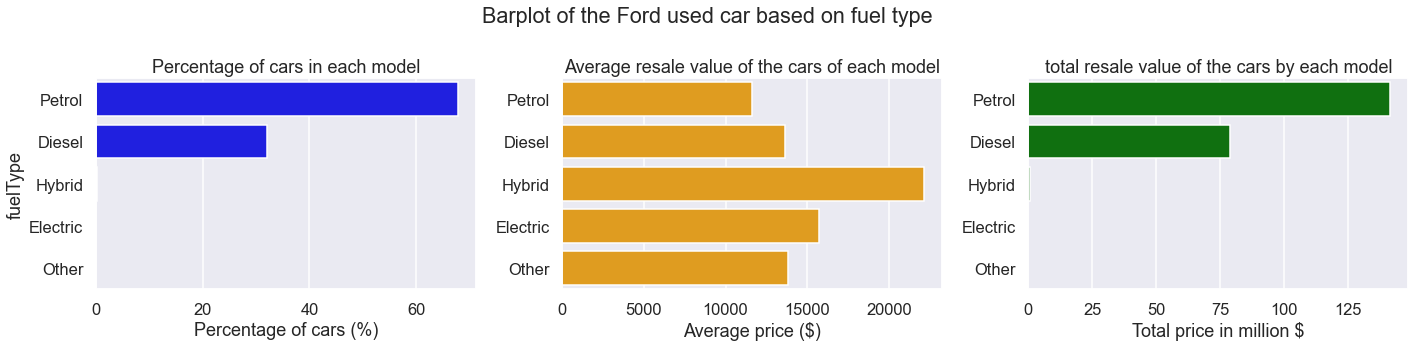

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_pivot_fuelType.index, data=df_pivot_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x=('mean', 'price'), y=df_pivot_fuelType.index, data=df_pivot_fuelType, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x=('sum', 'price'), y=df_pivot_fuelType.index, data=df_pivot_fuelType, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car based on fuel type")
plt.tight_layout()
plt.show()

- Most of the cars runs on Petrol
- Average price of a Hybrid car is higher than other fuel type cars
- Total resale value of Petrol type car is the highest 